### **Random forest**

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
import pickle
from pickle import dump
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import os
from utils import get_classifier_metrics

In [20]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from lightgbm import LGBMRegressor

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.metrics import r2_score
from pickle import dump
import warnings

warnings.filterwarnings('ignore')

In [21]:
ruta = '/workspaces/GuilloMansa-MachineLearning/models/train_test_split.pkl'

with open(ruta, 'rb') as f:
    X_train, X_test, y_train, y_test = pickle.load(f)

### **Modelado y entreno**

In [22]:
X_train, X_test, y_train, y_test

(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 29             5      117             92              0        0  34.1   
 286            5      155             84             44      545  38.7   
 35             4      103             60             33      192  24.0   
 392            1      131             64             14      415  23.7   
 12            10      139             80              0        0  27.1   
 ..           ...      ...            ...            ...      ...   ...   
 174            2       75             64             24       55  29.7   
 702            1      168             88             29        0  35.0   
 120            0      162             76             56      100  53.2   
 275            2      100             70             52       57  40.5   
 298           14      100             78             25      184  36.6   
 
      DiabetesPedigreeFunction  Age  
 29                      0.337   38  
 286                  

In [23]:
# modelos
ada = AdaBoostRegressor(n_estimators=100,
                        learning_rate=0.1,
                        random_state=18)
gb = GradientBoostingRegressor(n_estimators=100,
                               learning_rate=0.1,
                               random_state=18)
# xgb = XGBRegressor(n_estimators=100,
#                   learning_rate=0.1,
#                   random_state=18)
xgb = XGBRegressor(n_estimators=35,
                   learning_rate=0.5,
                   random_state=18)
lgb = LGBMRegressor(n_estimators=100,
                    learning_rate=0.1,
                    random_state=18)

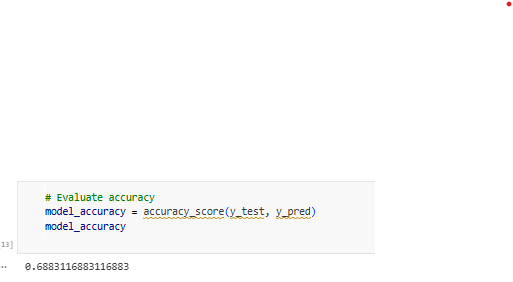

### **Entrenamiento**

In [24]:
ada.fit(X_train, y_train)

,estimator,None
,n_estimators,100
,learning_rate,0.1
,loss,'linear'
,random_state,18


In [25]:
gb.fit(X_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [26]:
xgb.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [27]:
lgb.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] Start training from score 0.340391
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [28]:
ada_y_pred_test = ada.predict(X_test)
gb_y_pred_test = gb.predict(X_test)
xgb_y_pred_test = xgb.predict(X_test)
lgb_y_pred_test = lgb.predict(X_test)

ada_y_pred_train = ada.predict(X_train)
gb_y_pred_train = gb.predict(X_train)
xgb_y_pred_train = xgb.predict(X_train)
lgb_y_pred_train = lgb.predict(X_train)

In [29]:
r2_train = (r2_score(y_train, ada_y_pred_train),
            r2_score(y_train, gb_y_pred_train),
            r2_score(y_train, xgb_y_pred_train),
            r2_score(y_train, lgb_y_pred_train))
r2_test = (r2_score(y_test, ada_y_pred_test),
           r2_score(y_test, gb_y_pred_test),
           r2_score(y_test, xgb_y_pred_test),
           r2_score(y_test, lgb_y_pred_test))

r2 = pd.DataFrame(data=[r2_train, r2_test],
                  columns=['AdaBoost', 'Gradient Boosting', 'XGBoost', 'LightGBM'],
                  index=['Train set', 'Test set'])

r2

,AdaBoost,Gradient Boosting,XGBoost,LightGBM
Train set,0.393222,0.688099,0.996603,0.890472
Test set,0.270228,0.210991,0.066347,0.141662


### **Prediccion**

### **Hiperparametrizacion**
- XGBoost utilizando RandomizeSearchCV (de scklearn)

In [31]:
# Nos enfocamos en regularizar (max_depth, learning_rate, gamma, subsample)
param_dist = {'n_estimators': [3, 5, 10, 35],
              'learning_rate': [0.01, 0.05, 0.1, 0.2],
              'max_depth': [1, 2, 3],
              'gamma': [0, 0.1, 0.5, 1, 2],
              'subsample': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
              'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0, 2.0]}


random_search = RandomizedSearchCV(estimator=xgb,
                                   param_distributions=param_dist,
                                   n_iter=50,
                                   scoring='r2',
                                   cv=5,
                                   verbose=1,
                                   random_state=18,
                                   n_jobs=-1)
# n_iter=50: Probar 50 combinaciones aleatorias.
# scoring='r2': Optimizar el R2.
# cv=5: Usar 5-fold Cross-Validation.
# n_jobs=-1: Usar todos los núcleos disponibles.

In [32]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


,estimator,"XGBRegressor(...ree=None, ...)"
,param_distributions,"{'colsample_bytree': [0.6, 0.7, ...], 'gamma': [0, 0.1, ...], 'learning_rate': [0.01, 0.05, ...], 'max_depth': [1, 2, ...], ...}"
,n_iter,50
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,18
,error_score,nan


In [33]:
# 1. Mostrar los mejores resultados
random_search.best_score_

np.float64(0.2849233150482178)

In [34]:
random_search.best_params_

{'subsample': 0.6,
 'n_estimators': 35,
 'max_depth': 2,
 'learning_rate': 0.05,
 'gamma': 0,
 'colsample_bytree': 0.8}

In [35]:
best_model = random_search.best_estimator_
best_model

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [36]:
y_pred_test = best_model.predict(X_test)
r2_test_final = r2_score(y_test, y_pred_test)
r2_test_final

0.22288179397583008

#### **Observacion:**
- Vemos que el r2_test_final nos da un resultado que no es bueno. Se entiende que nuestro modelo es un 22% , en relacion a nuestras variables predictoras y nuestro objetivo.